In [27]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import uproot
from pyts.visualization import plot_mtf, plot_gasf, plot_gadf, plot_recurrence_plots


file = "RefPulse009.root"


CPU times: user 29 µs, sys: 1 µs, total: 30 µs
Wall time: 34.8 µs


In [18]:
def reader_pmtall(path):
    extra = np.arange(4096, 4480)
    
    tree = uproot.open(path)["tree"]
    pmtall = tree.array("PMTALL")
    pmtall = np.delete(pmtall, extra, axis=1)
    pedestal = tree.array("Pedestal")
    pedestal = pedestal[:,0]
    
    for i in range(len(pedestal)):
        pmtall[i] = -(pmtall[i]-pedestal[i])
    
    return pmtall

def reader(path,branch,number):
    tree = uproot.open(path)["tree"]
    column = tree.array(branch)
    column = column[:,number]
    return column

def reader_lone(path,branch):
    tree = uproot.open(path)["tree"]
    column = tree.array(branch)
    return column


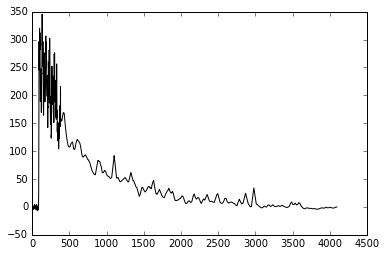

2770.336
0.15298106


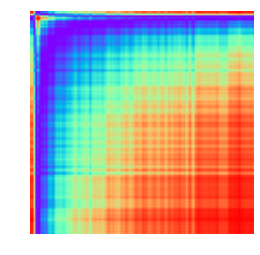

In [28]:
waveforms = reader_pmtall(file)
energy = reader(file,"Energy",1)
ratio4us = reader_lone(file,"Ratio4us")
length = len(waveforms)
psdpara1 = reader(file,"PSDPara",1)

# plt.figure()
# plt.hist(energy,bins=np.arange(0,6000,5))
# plt.show()

# plt.figure()
# plt.hist(ratio4us,bins=np.arange(0,2,0.01))
# plt.show()

# plt.figure()
# plt.hist(psdpara1)
# plt.show()

for i in range(1):
    k = i#np.random.randint(length)
    plt.figure()
    plt.plot(np.arange(4096),waveforms[k],color="k")
    plt.savefig("waveforms/ref.png")
    plt.show()
    print(energy[k])
    print(ratio4us[k])
    plot_gasf(waveforms[k], image_size=128, overlapping=False, scale='-1')
    plt.show()

